# Layer 9

In [1]:
import pandas as pd
import numpy as np

# from google.colab import drive
# drive.mount('/content/drive')

# DATASET_PATH = "/content/drive/MyDrive/ML Project/layer 9"
DATASET_PATH = "layer 9"

In [2]:
# CSV files into Pandas DataFrames
train_df = pd.read_csv(f"{DATASET_PATH}/train.csv")
valid_df = pd.read_csv(f"{DATASET_PATH}/valid.csv")
test_df = pd.read_csv(f"{DATASET_PATH}/test.csv")

### Preprocess

In [3]:
temp = list(train_df.columns)

FEATURES = temp[:-4]
LABELS = temp[-4:]

In [4]:
# drop ID column from the test dataset
x_test = test_df.drop('ID', axis=1)

x_test.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
0,0.013112,0.130904,0.020284,0.063018,-0.034321,-0.073516,-0.030659,-0.064994,0.024153,0.082765,...,0.037803,0.241121,0.079949,-0.186099,-0.096718,0.126006,-0.023069,0.190374,0.146516,0.038047
1,0.005934,0.138592,-0.007000,0.055925,-0.021927,-0.084788,0.013339,0.060811,-0.011344,0.039792,...,-0.098701,0.042921,0.018571,-0.114785,-0.105186,0.059050,0.021443,0.013027,0.046826,-0.026682
2,-0.067210,0.078710,-0.044344,0.101248,-0.074331,-0.088951,0.074616,0.007231,0.021091,0.080092,...,0.029569,0.053370,0.096232,-0.369018,-0.066708,-0.003730,-0.063339,-0.044497,-0.024363,-0.042594
3,-0.005678,0.060703,0.033954,0.068771,-0.039923,-0.186583,0.014921,0.020791,0.017441,0.016184,...,-0.095406,0.018405,-0.018047,-0.080393,-0.114030,0.048255,0.033839,0.035026,-0.047988,-0.038252
4,-0.076360,0.061095,-0.004938,0.066692,-0.040454,-0.005141,-0.003213,0.025721,0.083558,0.005890,...,-0.003129,0.045479,0.057146,-0.194466,0.000739,0.018702,0.013192,-0.038486,0.033358,-0.038452


In [5]:
# dict to store train and valid dataset for each label
x_train = {}
y_train = {}
x_valid = {}
y_valid = {}

# seperate the train and valid datasets into labels
# remove the rows where label is NaN

for label in LABELS:

    train_df_temp = train_df[~np.isnan(train_df[label])]
    valid_df_temp = valid_df[~np.isnan(valid_df[label])]

    x_train[label] = train_df_temp.drop(LABELS, axis=1)
    y_train[label] = train_df_temp[label]
    x_valid[label] = valid_df_temp.drop(LABELS, axis=1)
    y_valid[label] = valid_df_temp[label]

In [6]:
x_train['label_2'].head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
480,-0.037427,0.068284,-0.100538,0.076783,-0.113147,-0.079453,0.106947,0.011906,-0.047519,0.022915,...,0.061858,0.086089,0.004285,-0.325560,-0.035784,0.033521,-0.025551,0.083790,-0.027678,-0.008546
481,0.024931,0.045966,0.016385,0.028214,-0.092396,-0.053490,-0.018101,0.053902,0.080196,0.010693,...,0.048435,0.127840,0.060487,-0.268356,-0.001359,0.019178,0.068597,0.066214,0.141953,0.075839
482,0.025077,0.082511,0.074441,0.124308,-0.037937,-0.089271,0.012489,-0.036005,-0.023984,-0.010576,...,-0.081554,0.121891,0.042131,-0.019572,-0.095350,0.087392,0.007523,0.030705,0.086901,0.031186
483,0.030733,0.060249,0.099119,0.087801,-0.035729,-0.152115,0.032606,0.024821,0.032655,0.053826,...,0.039644,0.094773,-0.043471,-0.177032,-0.091252,0.031182,-0.034731,0.004988,0.143666,-0.012354
484,0.012062,0.068691,0.051343,0.049753,0.006491,-0.107100,0.076212,0.004650,0.113739,0.004015,...,-0.028502,0.123084,0.046536,-0.053508,-0.025445,0.062129,-0.034741,0.042223,-0.024982,0.132500


### Classifires

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def svm_classifier(x_train, y_train, x_valid, y_valid):
  model = SVC(kernel='linear')
  model.fit(x_train, y_train)
  y_predict = model.predict(x_valid)
  accuracy = accuracy_score(y_valid, y_predict)
  return accuracy

def weighted_svm_classifier(x_train, y_train, x_valid, y_valid):
  model = SVC(kernel='linear', class_weight='balanced')
  model.fit(x_train, y_train)
  y_predict = model.predict(x_valid)
  accuracy = accuracy_score(y_valid, y_predict)
  return accuracy



In [8]:
import xgboost as xgb

def xgb_classifier(x_train, y_train, x_valid, y_valid):
  model = xgb.XGBClassifier()
  model.fit(x_train, y_train)
  y_predict = model.predict(x_valid)
  accuracy = accuracy_score(y_valid, y_predict)
  return accuracy

### Grid Search / Random Search

In [9]:
from sklearn.model_selection import RandomizedSearchCV

def random_grid_search(model, param_dist, cv, n_iter, x_train, y_train):

  random_search = RandomizedSearchCV(
      estimator=model,
      param_distributions=param_dist,
      scoring='accuracy',
      cv=cv,
      verbose=1,
      n_jobs=-1,
      n_iter=n_iter
  )

  random_search.fit(x_train, y_train)

  return random_search


In [10]:
from sklearn.model_selection import GridSearchCV

def grid_search(model, param_dist, cv, x_train, y_train):

  grid_search = GridSearchCV(
      estimator=model,
      param_grid=param_dist,
      scoring='accuracy',
      cv=cv,
      verbose=1,
      n_jobs=-1
  )

  grid_search.fit(x_train, y_train)

  return grid_search


### Cross Validation

In [11]:
from sklearn.model_selection import cross_val_score

def k_fold_cross_validation(model, k, x_train, y_train):

    scores = cross_val_score(model, x_train, y_train, cv=k)
    mean_score = np.mean(scores)
    std_deviation = np.std(scores)
    print("Cross-Validation Scores:", scores)
    print("Mean Score:", mean_score)
    print("Standard Deviation:", std_deviation)

## Label 1

<AxesSubplot: xlabel='label_1', ylabel='count'>

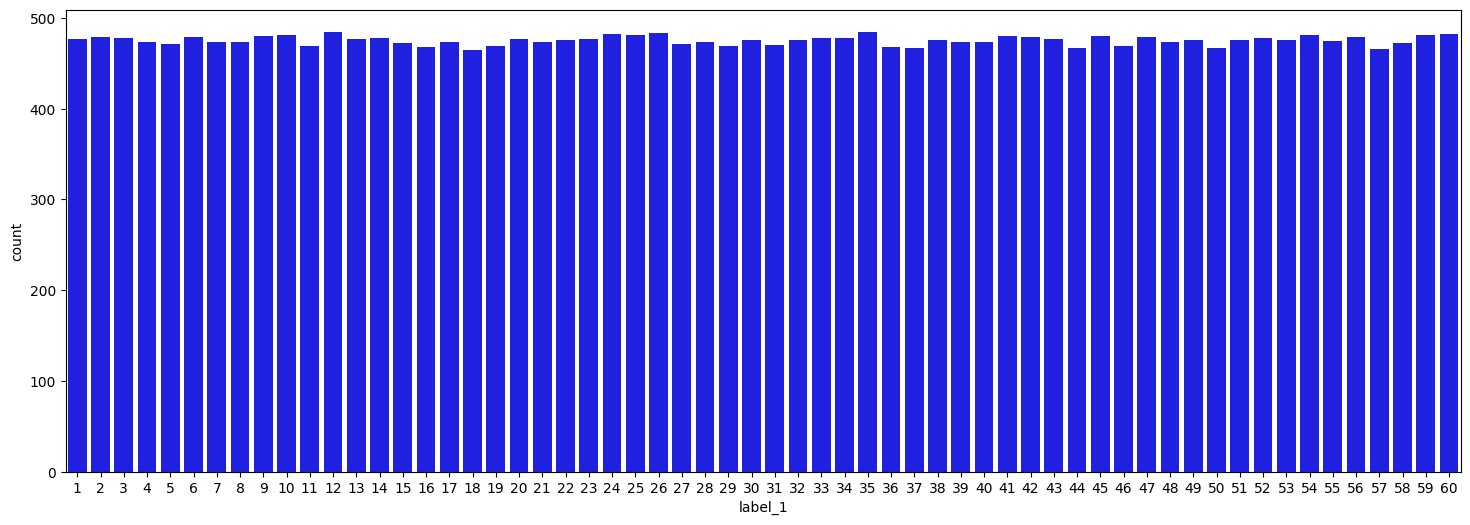

In [65]:
import matplotlib.pyplot as plt
import seaborn as sn

L1 = 'label_1'

plt.figure(figsize=(18,6))
sn.countplot(data=y_train, x=L1, color='blue')

#### Initial Accuracy

In [67]:
accuracy = svm_classifier(x_train[L1], y_train[L1], x_valid[L1], y_valid[L1])
print(f"Accuracy = {accuracy}")
# accuracy = xgb_classifier(x_train[L1], y_train[L1]-1, x_valid[L1], y_valid[L1]-1)
# print(f"Accuracy = {accuracy}")

Accuracy = 0.9693333333333334


#### Correlation

In [11]:
corr_matrix_l1 = x_train[L1].corr()

In [12]:
corr_matrix_l1

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
feature_1,1.000000,0.065348,-0.039416,0.116528,0.108225,-0.163679,0.131004,-0.073198,-0.045476,-0.120560,...,-0.225724,0.290177,0.015310,0.144664,-0.110313,-0.040330,0.132620,0.032706,0.035296,-0.039317
feature_2,0.065348,1.000000,0.043611,0.068624,-0.278709,0.052155,-0.267946,-0.214403,-0.235840,-0.056829,...,-0.150852,-0.096604,0.287950,-0.099087,0.269144,0.005612,-0.068710,-0.204834,-0.350866,0.162593
feature_3,-0.039416,0.043611,1.000000,-0.185437,-0.313107,-0.103496,-0.214606,-0.185952,0.155197,0.011407,...,-0.248988,-0.162378,-0.024814,0.162806,0.231606,0.204807,0.133835,-0.063354,0.159975,0.217143
feature_4,0.116528,0.068624,-0.185437,1.000000,0.096349,-0.220416,0.194002,0.027816,-0.144393,-0.148927,...,0.135598,0.071113,-0.084978,-0.166751,-0.220446,0.103712,0.100221,0.006758,0.034292,-0.128138
feature_5,0.108225,-0.278709,-0.313107,0.096349,1.000000,0.021056,0.325761,-0.000900,0.038333,-0.116997,...,-0.020572,0.024932,-0.202849,0.031865,-0.371326,-0.087327,-0.063512,0.016875,-0.031415,-0.203071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature_764,-0.040330,0.005612,0.204807,0.103712,-0.087327,-0.174192,0.122454,0.012446,0.199985,0.171440,...,0.075743,0.065512,-0.313912,-0.196618,-0.114188,1.000000,0.208730,0.181622,0.405485,-0.009266
feature_765,0.132620,-0.068710,0.133835,0.100221,-0.063512,-0.345465,-0.002038,0.005804,0.053829,-0.116723,...,-0.103060,0.180543,-0.010908,-0.076788,0.228983,0.208730,1.000000,-0.204636,0.278358,-0.172730
feature_766,0.032706,-0.204834,-0.063354,0.006758,0.016875,-0.233690,0.282928,-0.105139,0.097498,0.391228,...,0.096985,0.293527,-0.266795,0.168379,-0.486373,0.181622,-0.204636,1.000000,0.388446,-0.065182
feature_767,0.035296,-0.350866,0.159975,0.034292,-0.031415,-0.350340,0.185927,0.045446,0.113304,0.265687,...,0.115303,0.274362,-0.343106,0.081103,-0.327079,0.405485,0.278358,0.388446,1.000000,-0.132940


In [13]:
def get_corr_features(corr_matrix, threshold):

  correlated_features = []

  for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
      if (abs(corr_matrix.iloc[i, j]) > threshold):
        col_name = corr_matrix.columns[j]
        if col_name not in correlated_features:
          correlated_features.append(col_name)

  return correlated_features

In [15]:
correlated_features_l1 = get_corr_features(corr_matrix_l1, 0.7)
print(len(correlated_features_l1))

8


#### PCA

In [68]:
from sklearn.preprocessing import StandardScaler

x_test_l1 = x_test.copy()

scaler = StandardScaler()
x_train[L1] = pd.DataFrame(scaler.fit_transform(x_train[L1]), columns=FEATURES)
x_valid[L1] = pd.DataFrame(scaler.transform(x_valid[L1]), columns=FEATURES)
x_test_l1 = pd.DataFrame(scaler.transform(x_test_l1), columns=FEATURES)

In [69]:
from sklearn.decomposition import PCA

threshold = 0.96

pca = PCA(n_components=threshold, svd_solver='full')
x_train_l1_pca = pd.DataFrame(pca.fit_transform(x_train[L1]))
x_valid_l1_pca = pd.DataFrame(pca.transform(x_valid[L1]))
x_test_l1_pca = pd.DataFrame(pca.transform(x_test_l1))

explained_variance = pca.explained_variance_ratio_

print(f"Number of features: {len(explained_variance)}")

Number of features: 350


In [70]:
accuracy_1 = svm_classifier(x_train_l1_pca, y_train[L1], x_valid_l1_pca, y_valid[L1])
print(f"Accuracy = {accuracy_1}")

Accuracy = 0.9333333333333333


#### Hyperparameter Tuning - Random Grid Search

In [75]:
param_dist = {
    'C': np.logspace(-3, 3, 7),
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': np.logspace(-3, 3, 7)
}
cv = 2
n_iter = 5
svm = SVC()

# random_search_l1 = grid_search(svm, param_dist, cv, x_train_l1_pca, y_train[L1])
random_search_l1 = random_grid_search(svm, param_dist, cv, n_iter, x_train_l1_pca, y_train[L1])
best_model_l1 = random_search_l1.best_estimator_
best_accuracy_l1 = random_search_l1.best_score_
best_param = random_search_l1.best_params_

print(best_param)
print(best_accuracy_l1)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
{'kernel': 'rbf', 'gamma': 0.001, 'C': 1000.0}
0.9417601683029453


In [76]:
y_pred_l1 = best_model_l1.predict(x_valid_l1_pca)
accuracy = accuracy_score(y_valid[L1], y_pred_l1)
print(f"Accuracy after: {accuracy}")

Accuracy after: 0.9613333333333334


#### Cross Validation

In [126]:
model = SVC(kernel= 'rbf', gamma= 0.001, C= 1000.0)

k_fold_cross_validation(model, 5, x_train_l1_pca, y_train[L1])

Cross-Validation Scores: [0.95564516 0.95704769 0.95371669 0.95196353 0.95704769]
Mean Score: 0.9550841514726507
Standard Deviation: 0.001981608857074996


## Label 2

<AxesSubplot: xlabel='label_2', ylabel='count'>

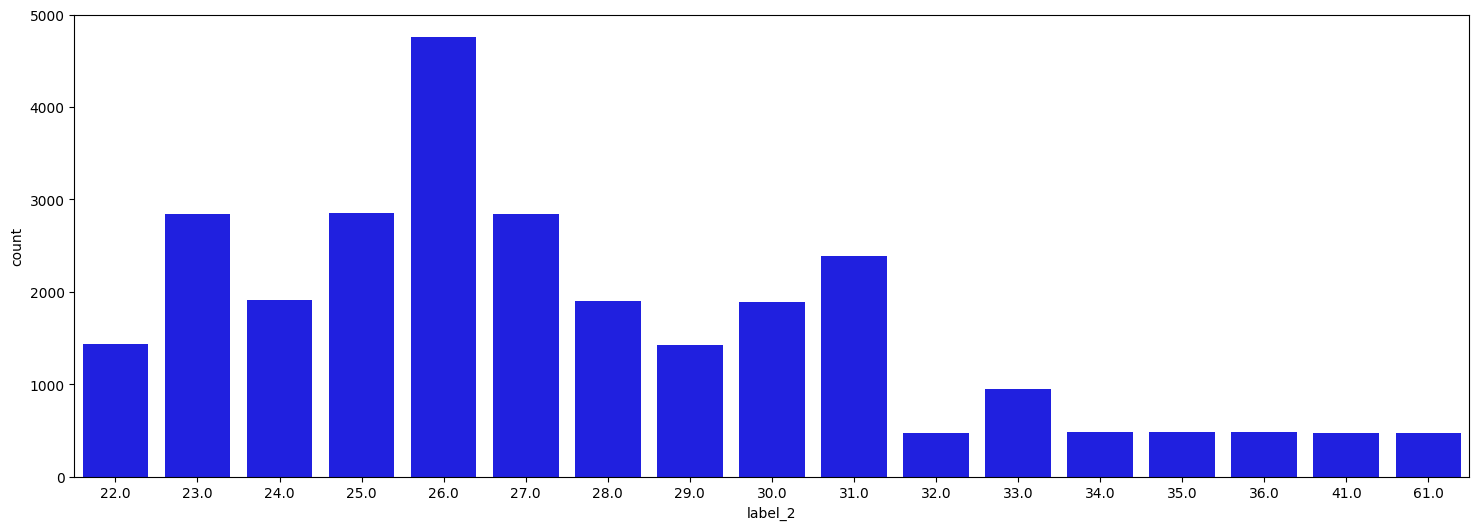

In [12]:
import matplotlib.pyplot as plt
import seaborn as sn

L2 = 'label_2'

plt.figure(figsize=(18,6))
sn.countplot(data=y_train, x=L2, color='blue')

#### Initial Accuracy

In [79]:
accuracy = weighted_svm_classifier(x_train[L2], y_train[L2], x_valid[L2], y_valid[L2])
print(f"Accuracy = {accuracy}")

Accuracy = 0.8233695652173914


#### Correlation

In [81]:
corr_matrix_l2 = x_train[L2].corr()

In [82]:
corr_matrix_l2

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
feature_1,1.000000,0.056876,-0.039498,0.118076,0.112851,-0.166600,0.137696,-0.072975,-0.043850,-0.113356,...,-0.225903,0.293434,0.009847,0.145848,-0.115566,-0.034812,0.134990,0.038377,0.038189,-0.047894
feature_2,0.056876,1.000000,0.047595,0.063880,-0.275346,0.051292,-0.265063,-0.212084,-0.233523,-0.044382,...,-0.151111,-0.094786,0.281682,-0.099535,0.265121,0.015314,-0.066985,-0.197673,-0.344760,0.158917
feature_3,-0.039498,0.047595,1.000000,-0.180691,-0.317822,-0.105887,-0.218088,-0.187760,0.148033,0.008087,...,-0.249580,-0.162531,-0.022784,0.165992,0.233145,0.205415,0.134334,-0.068711,0.158498,0.214362
feature_4,0.118076,0.063880,-0.180691,1.000000,0.100580,-0.220944,0.196603,0.031122,-0.141089,-0.146779,...,0.135778,0.075056,-0.089173,-0.170199,-0.221257,0.106697,0.103314,0.013078,0.040056,-0.126484
feature_5,0.112851,-0.275346,-0.317822,0.100580,1.000000,0.024638,0.323135,-0.001072,0.033806,-0.122683,...,-0.017675,0.020871,-0.198018,0.029311,-0.369320,-0.092976,-0.067953,0.012496,-0.039707,-0.199933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature_764,-0.034812,0.015314,0.205415,0.106697,-0.092976,-0.172826,0.116927,0.012693,0.201621,0.168050,...,0.069499,0.071036,-0.309803,-0.196119,-0.108149,1.000000,0.207256,0.176582,0.402581,-0.006868
feature_765,0.134990,-0.066985,0.134334,0.103314,-0.067953,-0.344325,-0.006739,0.005132,0.054664,-0.120180,...,-0.105545,0.182059,-0.009149,-0.075866,0.231146,0.207256,1.000000,-0.207324,0.276912,-0.173424
feature_766,0.038377,-0.197673,-0.068711,0.013078,0.012496,-0.237159,0.279386,-0.107323,0.094012,0.386221,...,0.101085,0.295610,-0.266255,0.167763,-0.485058,0.176582,-0.207324,1.000000,0.385526,-0.064913
feature_767,0.038189,-0.344760,0.158498,0.040056,-0.039707,-0.347955,0.181550,0.041326,0.109208,0.260041,...,0.118570,0.277248,-0.337285,0.080803,-0.323770,0.402581,0.276912,0.385526,1.000000,-0.133094


In [83]:
def get_corr_features(corr_matrix, threshold):

  correlated_features = []

  for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
      if (abs(corr_matrix.iloc[i, j]) > threshold):
        col_name = corr_matrix.columns[j]
        if col_name not in correlated_features:
          correlated_features.append(col_name)

  return correlated_features

In [84]:
correlated_features_l2 = get_corr_features(corr_matrix_l2, 0.7)
print(len(correlated_features_l2))

8


#### PCA

In [13]:
from sklearn.preprocessing import StandardScaler

x_test_l2 = x_test.copy()

scaler = StandardScaler()
x_train[L2] = pd.DataFrame(scaler.fit_transform(x_train[L2]), columns=FEATURES)
x_valid[L2] = pd.DataFrame(scaler.transform(x_valid[L2]), columns=FEATURES)
x_test_l2 = pd.DataFrame(scaler.transform(x_test_l2), columns=FEATURES)

In [14]:
from sklearn.decomposition import PCA

threshold = 0.96

pca = PCA(n_components=threshold, svd_solver='full')
x_train_l2_pca = pd.DataFrame(pca.fit_transform(x_train[L2]))
x_valid_l2_pca = pd.DataFrame(pca.transform(x_valid[L2]))
x_test_l2_pca = pd.DataFrame(pca.transform(x_test_l2))

explained_variance = pca.explained_variance_ratio_

print(f"Number of features: {len(explained_variance)}")

Number of features: 350


In [15]:
accuracy_1 = weighted_svm_classifier(x_train_l2_pca, y_train[L2], x_valid_l2_pca, y_valid[L2])
print(f"Accuracy = {accuracy_1}")

Accuracy = 0.8057065217391305


#### Hyperparameter Tuning - Random Grid Search

In [90]:
param_dist = {
    'C': np.logspace(-3, 3, 7),
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': np.logspace(-3, 3, 7),
    'class_weight': ['balanced']
}
cv = 2
n_iter = 5
svm = SVC()

random_search_l2 = random_grid_search(svm, param_dist, cv, n_iter, x_train_l2_pca, y_train[L2])
best_model_l2 = random_search_l2.best_estimator_
best_accuracy_l2 = random_search_l2.best_score_
best_param = random_search_l2.best_params_

print(best_param)
print(best_accuracy_l2)


Fitting 2 folds for each of 5 candidates, totalling 10 fits


{'kernel': 'poly', 'gamma': 100.0, 'class_weight': 'balanced', 'C': 100.0}
0.2661198288159772


In [91]:
y_pred_l2 = best_model_l2.predict(x_valid_l2_pca)
accuracy = accuracy_score(y_valid[L2], y_pred_l2)
print(f"Accuracy after: {accuracy}")

Accuracy after: 0.9347826086956522


#### Cross Validation

In [18]:
model = SVC(kernel= 'poly', gamma= 100.0, class_weight= 'balanced', C= 100.0)

k_fold_cross_validation(model, 5, x_train_l2_pca, y_train[L2])

Cross-Validation Scores: [0.45827389 0.69561341 0.71968616 0.72628388 0.50499287]
Mean Score: 0.6209700427960058
Standard Deviation: 0.11517660418375814


## Label 3

<AxesSubplot: xlabel='label_3', ylabel='count'>

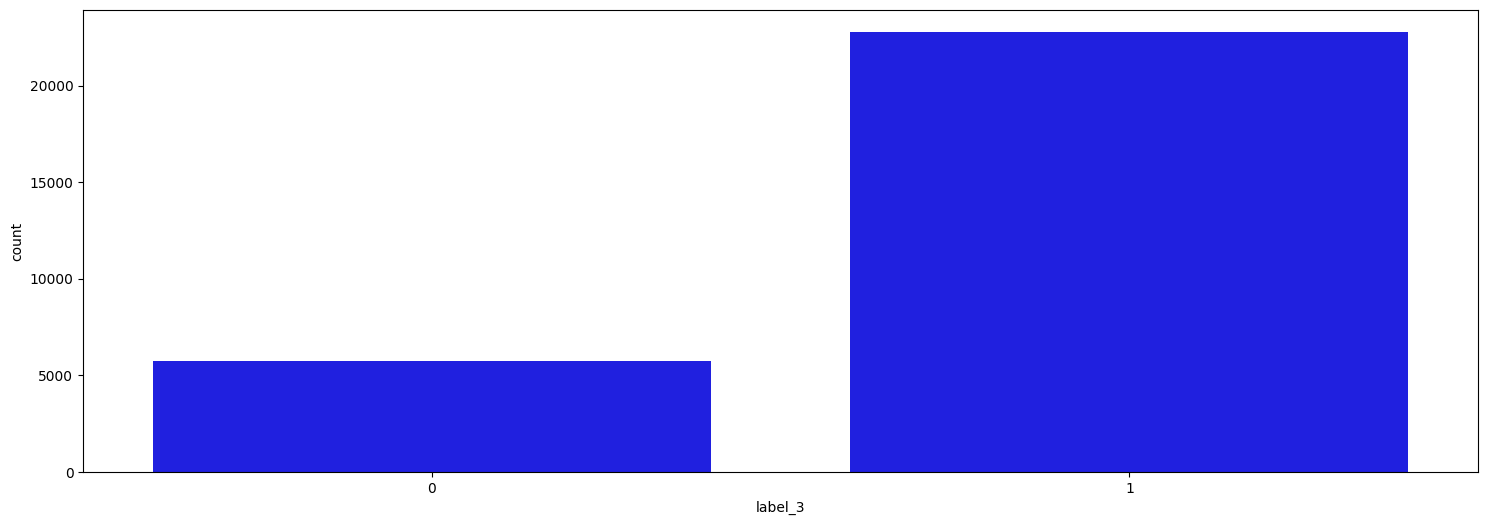

In [19]:
import matplotlib.pyplot as plt
import seaborn as sn

L3 = 'label_3'

plt.figure(figsize=(18,6))
sn.countplot(data=y_train, x=L3, color='blue')

#### Initial Accuracy

In [93]:
accuracy = weighted_svm_classifier(x_train[L3], y_train[L3], x_valid[L3], y_valid[L3])
print(f"Accuracy = {accuracy}")

Accuracy = 0.9933333333333333


#### Correlation

In [94]:
corr_matrix_l3 = x_train[L3].corr()

In [95]:
corr_matrix_l3

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
feature_1,1.000000,0.065348,-0.039416,0.116528,0.108225,-0.163679,0.131004,-0.073198,-0.045476,-0.120560,...,-0.225724,0.290177,0.015310,0.144664,-0.110313,-0.040330,0.132620,0.032706,0.035296,-0.039317
feature_2,0.065348,1.000000,0.043611,0.068624,-0.278709,0.052155,-0.267946,-0.214403,-0.235840,-0.056829,...,-0.150852,-0.096604,0.287950,-0.099087,0.269144,0.005612,-0.068710,-0.204834,-0.350866,0.162593
feature_3,-0.039416,0.043611,1.000000,-0.185437,-0.313107,-0.103496,-0.214606,-0.185952,0.155197,0.011407,...,-0.248988,-0.162378,-0.024814,0.162806,0.231606,0.204807,0.133835,-0.063354,0.159975,0.217143
feature_4,0.116528,0.068624,-0.185437,1.000000,0.096349,-0.220416,0.194002,0.027816,-0.144393,-0.148927,...,0.135598,0.071113,-0.084978,-0.166751,-0.220446,0.103712,0.100221,0.006758,0.034292,-0.128138
feature_5,0.108225,-0.278709,-0.313107,0.096349,1.000000,0.021056,0.325761,-0.000900,0.038333,-0.116997,...,-0.020572,0.024932,-0.202849,0.031865,-0.371326,-0.087327,-0.063512,0.016875,-0.031415,-0.203071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature_764,-0.040330,0.005612,0.204807,0.103712,-0.087327,-0.174192,0.122454,0.012446,0.199985,0.171440,...,0.075743,0.065512,-0.313912,-0.196618,-0.114188,1.000000,0.208730,0.181622,0.405485,-0.009266
feature_765,0.132620,-0.068710,0.133835,0.100221,-0.063512,-0.345465,-0.002038,0.005804,0.053829,-0.116723,...,-0.103060,0.180543,-0.010908,-0.076788,0.228983,0.208730,1.000000,-0.204636,0.278358,-0.172730
feature_766,0.032706,-0.204834,-0.063354,0.006758,0.016875,-0.233690,0.282928,-0.105139,0.097498,0.391228,...,0.096985,0.293527,-0.266795,0.168379,-0.486373,0.181622,-0.204636,1.000000,0.388446,-0.065182
feature_767,0.035296,-0.350866,0.159975,0.034292,-0.031415,-0.350340,0.185927,0.045446,0.113304,0.265687,...,0.115303,0.274362,-0.343106,0.081103,-0.327079,0.405485,0.278358,0.388446,1.000000,-0.132940


In [96]:
def get_corr_features(corr_matrix, threshold):

  correlated_features = []

  for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
      if (abs(corr_matrix.iloc[i, j]) > threshold):
        col_name = corr_matrix.columns[j]
        if col_name not in correlated_features:
          correlated_features.append(col_name)

  return correlated_features

In [97]:
correlated_features_l3 = get_corr_features(corr_matrix_l3, 0.7)
print(len(correlated_features_l3))

8


#### PCA

In [20]:
from sklearn.preprocessing import StandardScaler

x_test_l3 = x_test.copy()

scaler = StandardScaler()
x_train[L3] = pd.DataFrame(scaler.fit_transform(x_train[L3]), columns=FEATURES)
x_valid[L3] = pd.DataFrame(scaler.transform(x_valid[L3]), columns=FEATURES)
x_test_l3 = pd.DataFrame(scaler.transform(x_test_l3), columns=FEATURES)

In [21]:
from sklearn.decomposition import PCA

threshold = 0.96

pca = PCA(n_components=threshold, svd_solver='full')
x_train_l3_pca = pd.DataFrame(pca.fit_transform(x_train[L3]))
x_valid_l3_pca = pd.DataFrame(pca.transform(x_valid[L3]))
x_test_l3_pca = pd.DataFrame(pca.transform(x_test_l3))

explained_variance = pca.explained_variance_ratio_

print(f"Number of features: {len(explained_variance)}")

Number of features: 350


In [22]:
accuracy_1 = weighted_svm_classifier(x_train_l3_pca, y_train[L3], x_valid_l3_pca, y_valid[L3])
print(f"Accuracy = {accuracy_1}")

Accuracy = 0.996


#### Hyperparameter Tuning - Random Grid Search

In [101]:
param_dist = {
    'C': np.logspace(-3, 3, 7),
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': np.logspace(-3, 3, 7),
    'class_weight': ['balanced']
}
cv = 2
n_iter = 5
svm = SVC()

random_search_l3 = random_grid_search(svm, param_dist, cv, n_iter, x_train_l3_pca, y_train[L3])
best_model_l3 = random_search_l3.best_estimator_
best_accuracy_l3 = random_search_l3.best_score_
best_param = random_search_l3.best_params_

print(best_param)
print(best_accuracy_l3)


Fitting 2 folds for each of 5 candidates, totalling 10 fits
{'kernel': 'poly', 'gamma': 100.0, 'class_weight': 'balanced', 'C': 0.01}
0.9591164095371669


In [102]:
y_pred_l3 = best_model_l3.predict(x_valid_l3_pca)
accuracy = accuracy_score(y_valid[L3], y_pred_l3)
print(f"Accuracy after: {accuracy}")

Accuracy after: 0.9973333333333333


#### Cross Validation

In [23]:
model = SVC(kernel= 'poly', gamma= 100.0, class_weight= 'balanced', C= 0.01)

k_fold_cross_validation(model, 5, x_train_l3_pca, y_train[L3])

Cross-Validation Scores: [0.97492987 0.99509116 0.98159187 0.98264376 0.98439691]
Mean Score: 0.9837307152875174
Standard Deviation: 0.0065224931323021994


## Label 4

<AxesSubplot: xlabel='label_4', ylabel='count'>

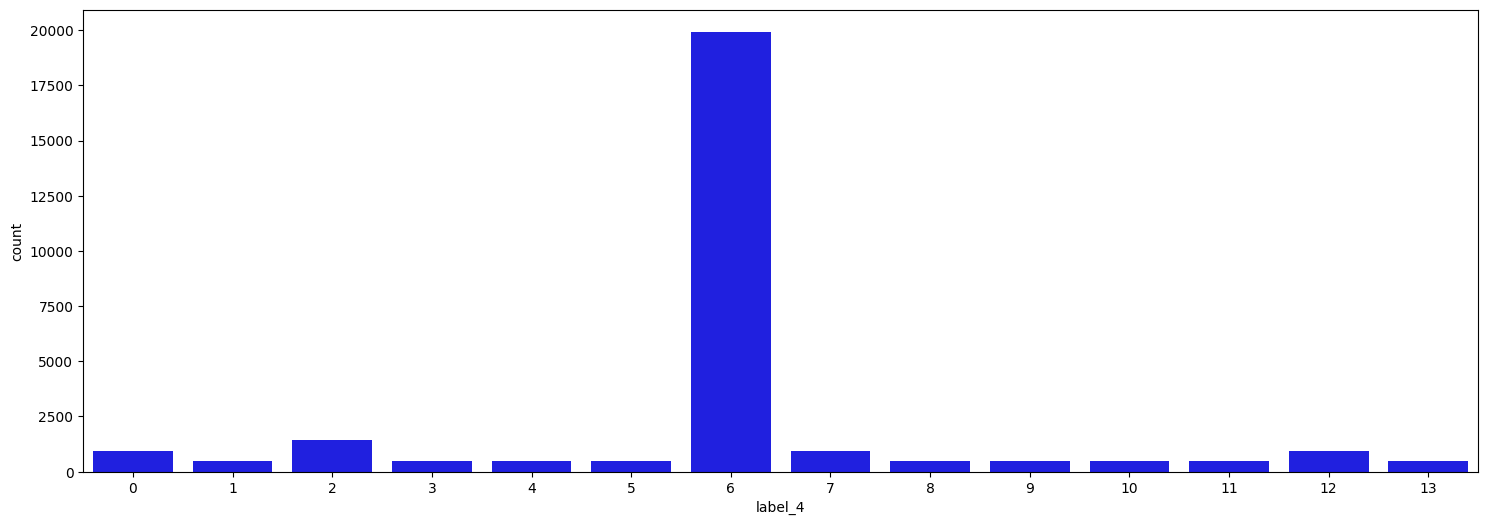

In [24]:
import matplotlib.pyplot as plt
import seaborn as sn

L4 = 'label_4'

plt.figure(figsize=(18,6))
sn.countplot(data=y_train, x=L4, color='blue')

#### Initial Accuracy

In [104]:
accuracy = weighted_svm_classifier(x_train[L4], y_train[L4], x_valid[L4], y_valid[L4])
print(f"Accuracy = {accuracy}")

Accuracy = 0.8866666666666667


#### Correlation

In [105]:
corr_matrix_l4 = x_train[L4].corr()

In [106]:
corr_matrix_l4

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
feature_1,1.000000,0.065348,-0.039416,0.116528,0.108225,-0.163679,0.131004,-0.073198,-0.045476,-0.120560,...,-0.225724,0.290177,0.015310,0.144664,-0.110313,-0.040330,0.132620,0.032706,0.035296,-0.039317
feature_2,0.065348,1.000000,0.043611,0.068624,-0.278709,0.052155,-0.267946,-0.214403,-0.235840,-0.056829,...,-0.150852,-0.096604,0.287950,-0.099087,0.269144,0.005612,-0.068710,-0.204834,-0.350866,0.162593
feature_3,-0.039416,0.043611,1.000000,-0.185437,-0.313107,-0.103496,-0.214606,-0.185952,0.155197,0.011407,...,-0.248988,-0.162378,-0.024814,0.162806,0.231606,0.204807,0.133835,-0.063354,0.159975,0.217143
feature_4,0.116528,0.068624,-0.185437,1.000000,0.096349,-0.220416,0.194002,0.027816,-0.144393,-0.148927,...,0.135598,0.071113,-0.084978,-0.166751,-0.220446,0.103712,0.100221,0.006758,0.034292,-0.128138
feature_5,0.108225,-0.278709,-0.313107,0.096349,1.000000,0.021056,0.325761,-0.000900,0.038333,-0.116997,...,-0.020572,0.024932,-0.202849,0.031865,-0.371326,-0.087327,-0.063512,0.016875,-0.031415,-0.203071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature_764,-0.040330,0.005612,0.204807,0.103712,-0.087327,-0.174192,0.122454,0.012446,0.199985,0.171440,...,0.075743,0.065512,-0.313912,-0.196618,-0.114188,1.000000,0.208730,0.181622,0.405485,-0.009266
feature_765,0.132620,-0.068710,0.133835,0.100221,-0.063512,-0.345465,-0.002038,0.005804,0.053829,-0.116723,...,-0.103060,0.180543,-0.010908,-0.076788,0.228983,0.208730,1.000000,-0.204636,0.278358,-0.172730
feature_766,0.032706,-0.204834,-0.063354,0.006758,0.016875,-0.233690,0.282928,-0.105139,0.097498,0.391228,...,0.096985,0.293527,-0.266795,0.168379,-0.486373,0.181622,-0.204636,1.000000,0.388446,-0.065182
feature_767,0.035296,-0.350866,0.159975,0.034292,-0.031415,-0.350340,0.185927,0.045446,0.113304,0.265687,...,0.115303,0.274362,-0.343106,0.081103,-0.327079,0.405485,0.278358,0.388446,1.000000,-0.132940


In [107]:
def get_corr_features(corr_matrix, threshold):

  correlated_features = []

  for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
      if (abs(corr_matrix.iloc[i, j]) > threshold):
        col_name = corr_matrix.columns[j]
        if col_name not in correlated_features:
          correlated_features.append(col_name)

  return correlated_features

In [108]:
correlated_features_l4 = get_corr_features(corr_matrix_l4, 0.7)
print(len(correlated_features_l4))

8


#### PCA

In [25]:
from sklearn.preprocessing import StandardScaler

x_test_l4 = x_test.copy()

scaler = StandardScaler()
x_train[L4] = pd.DataFrame(scaler.fit_transform(x_train[L4]), columns=FEATURES)
x_valid[L4] = pd.DataFrame(scaler.transform(x_valid[L4]), columns=FEATURES)
x_test_l4 = pd.DataFrame(scaler.transform(x_test_l4), columns=FEATURES)

In [26]:
from sklearn.decomposition import PCA

threshold = 0.96

pca = PCA(n_components=threshold, svd_solver='full')
x_train_l4_pca = pd.DataFrame(pca.fit_transform(x_train[L4]))
x_valid_l4_pca = pd.DataFrame(pca.transform(x_valid[L4]))
x_test_l4_pca = pd.DataFrame(pca.transform(x_test_l4))

explained_variance = pca.explained_variance_ratio_

print(f"Number of features: {len(explained_variance)}")

Number of features: 350


In [27]:
accuracy_1 = weighted_svm_classifier(x_train_l4_pca, y_train[L4], x_valid_l4_pca, y_valid[L4])
print(f"Accuracy = {accuracy_1}")

Accuracy = 0.8906666666666667


#### Hyperparameter Tuning - Random Grid Search

In [113]:
param_dist = {
    'C': np.logspace(-3, 3, 7),
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': np.logspace(-3, 3, 7),
    'class_weight': ['balanced']
}
cv = 2
n_iter = 5
svm = SVC()

random_search_l4 = random_grid_search(svm, param_dist, cv, n_iter, x_train_l4_pca, y_train[L4])
best_model_l4 = random_search_l4.best_estimator_
best_accuracy_l4 = random_search_l4.best_score_
best_param = random_search_l4.best_params_

print(best_param)
print(best_accuracy_l4)


Fitting 2 folds for each of 5 candidates, totalling 10 fits


{'kernel': 'poly', 'gamma': 1000.0, 'class_weight': 'balanced', 'C': 0.01}
0.8159186535764376


In [114]:
y_pred_l4 = best_model_l4.predict(x_valid_l1_pca)
accuracy = accuracy_score(y_valid[L4], y_pred_l4)
print(f"Accuracy after: {accuracy}")

Accuracy after: 0.9746666666666667


#### Cross Validation

In [28]:
model = SVC(kernel= 'poly', gamma= 1000.0, class_weight= 'balanced', C= 0.01)

k_fold_cross_validation(model, 5, x_train_l4_pca, y_train[L4])

Cross-Validation Scores: [0.94161992 0.92952314 0.9414446  0.94670407 0.92180926]
Mean Score: 0.9362201963534362
Standard Deviation: 0.009153017446849782


## Prediciton

In [115]:
# Label 1
pred_l1 = best_model_l1.predict(x_test_l1_pca)
# Label 2
pred_l2 = best_model_l2.predict(x_test_l2_pca)
# Label 3
pred_l3 = best_model_l3.predict(x_test_l3_pca)
# Label 4
pred_l4 = best_model_l4.predict(x_test_l4_pca)

In [124]:
id_list = test_df['ID']

result = {
    'ID': id_list,
    'label_1': pred_l1,
    'label_2': pred_l2,
    'label_3': pred_l3,
    'label_4': pred_l4
}

result_df = pd.DataFrame(result)

result_df.to_csv('layer_9.csv', index=False)
